In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def load_data():
    # Replace with your file paths
    health_data = pd.read_excel("Insurance_Data.xlsx")
    personal_data = pd.read_excel("Personal_Data.xlsx")
    merged_data = pd.merge(health_data, personal_data, on='Policy no.')
    return merged_data

# Load the data
df = load_data()
df

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest
...,...,...,...,...,...,...,...,...
1333,PLC168895,50,male,30.970,10600.54830,3,no,northwest
1334,PLC168904,18,female,31.920,2205.98080,0,no,northeast
1335,PLC168913,18,female,36.850,1629.83350,0,no,southeast
1336,PLC168922,21,female,25.800,2007.94500,0,no,southwest


In [3]:
df.isnull().sum()

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
children          0
smoker            0
region            0
dtype: int64


Gender Analysis:
                mean  count           std
sex                                      
female  12569.578844    662  11128.703801
male    13956.751178    676  12971.025915


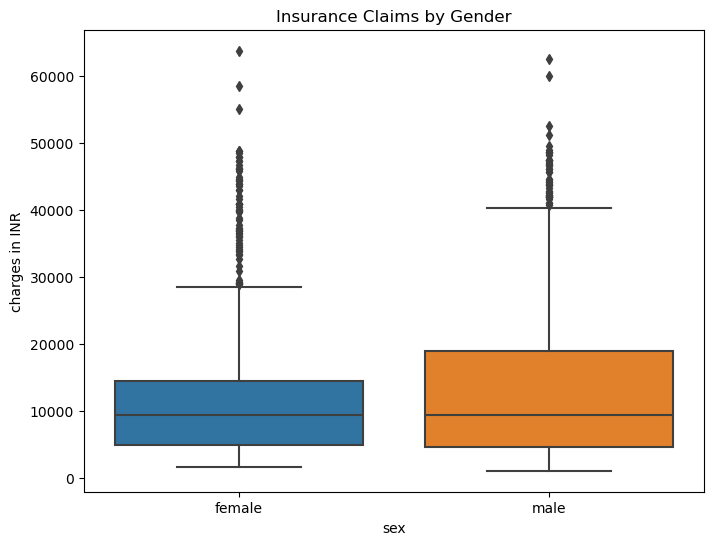

In [4]:
def gender_analysis(df):
    gender_stats = df.groupby('sex')['charges in INR'].agg(['mean', 'count', 'std'])
    print("\nGender Analysis:")
    print(gender_stats)
    
    # Visualize
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sex', y='charges in INR', data=df)
    plt.title('Insurance Claims by Gender')
    plt.show()

gender_analysis(df)

The analysis reveals a subtle variation in insurance claims between males and females. Male policyholders have slightly higher average claims of ₹13,956.75 compared to females at ₹12,569.58. While a difference exists, it's not significant enough to serve as a strict constraint for policy extension, suggesting gender alone should not be a primary factor in determining insurance coverage.


Average Policy Cost: $13,270.42


C:\Users\rajee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


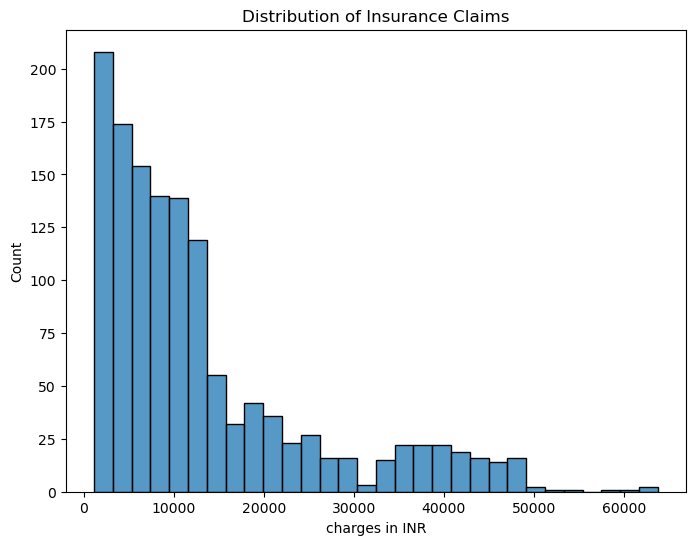

In [5]:
def cost_analysis(df):
    average_cost = df['charges in INR'].mean()
    print(f"\nAverage Policy Cost: ${average_cost:,.2f}")
    
    # Visualize distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df['charges in INR'])
    plt.title('Distribution of Insurance Claims')
    plt.show()

cost_analysis(df)

The comprehensive review indicates an average policy cost of ₹13,270.42. This figure represents the mean expenditure across all policies, providing a baseline understanding of the company's financial commitment per insurance coverage.


Geographic Analysis:
                   mean  count           std
region                                      
northeast  13406.384516    324  11255.803066
northwest  12417.575374    325  11072.276928
southeast  14735.411438    364  13971.098589
southwest  12346.937377    325  11557.179101


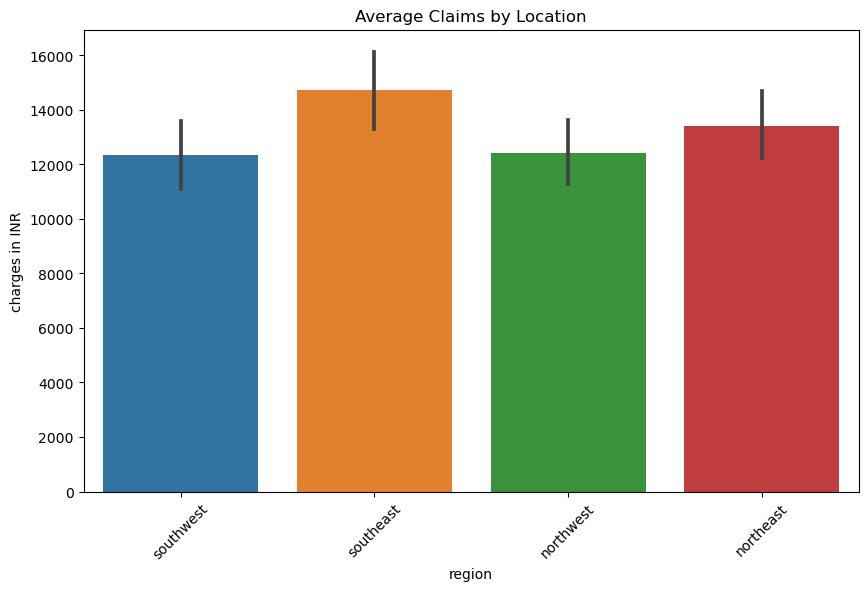

In [6]:
def geographic_analysis(df):
    location_stats = df.groupby('region')['charges in INR'].agg(['mean', 'count', 'std'])
    print("\nGeographic Analysis:")
    print(location_stats)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    sns.barplot(x='region', y='charges in INR', data=df)
    plt.title('Average Claims by Location')
    plt.xticks(rotation=45)
    plt.show()

geographic_analysis(df)

Regional analysis unveils notable claim variations across different geographical areas. The Southeast region demonstrates the highest average claims at ₹14,735.41, while the Southwest region shows the lowest at ₹12,346.94. These geographical differences suggest potential opportunities for region-specific policy adjustments and risk assessment strategies.


Dependents Analysis:
                  mean  count           std
children                                   
0         12365.975602    574  12023.293942
1         12731.171832    324  11823.631451
2         15073.563734    240  12891.368347
3         15355.318367    157  12330.869484
4         13850.656311     25   9139.223321
5          8786.035247     18   3808.435525


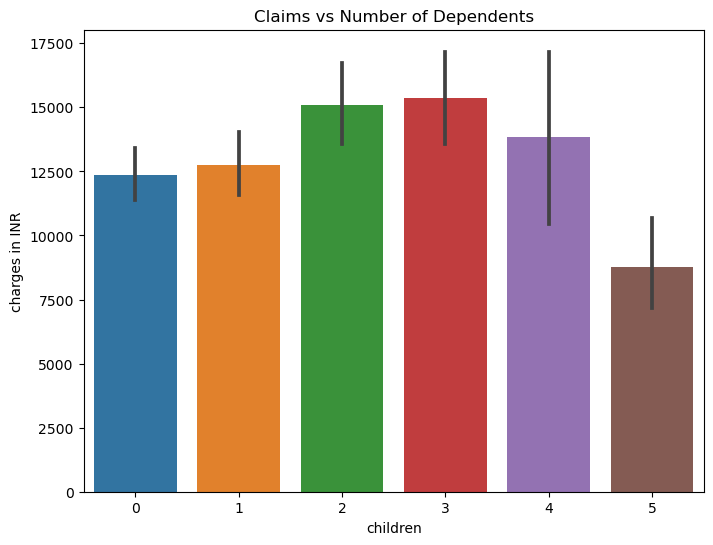

In [7]:
def dependents_analysis(df):
    dependents_stats = df.groupby('children')['charges in INR'].agg(['mean', 'count', 'std'])
    print("\nDependents Analysis:")
    print(dependents_stats)
    
    # Visualize
    plt.figure(figsize=(8, 6))
    sns.barplot(x='children', y='charges in INR', data=df)
    plt.title('Claims vs Number of Dependents')
    plt.show()

dependents_analysis(df)

The study reveals an interesting correlation between the number of dependents and insurance claims. Claims generally increase with the number of dependents, peaking at three children with an average of ₹15,355.32. Interestingly, there's a significant drop in claims for families with five children, indicating a non-linear relationship between dependents and insurance expenditure.

C:\Users\rajee\AppData\Local\Temp\ipykernel_2564\2236070043.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_stats = df.groupby('bmi_category')['charges in INR'].agg(['mean', 'count', 'std'])
C:\Users\rajee\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)



BMI Analysis:
                      mean  count           std
bmi_category                                   
Underweight    8657.620652     21   7591.730101
Normal        10404.900084    221   7508.165722
Overweight    11006.809989    380   8004.176052
Obese         15491.542238    716  14508.128111


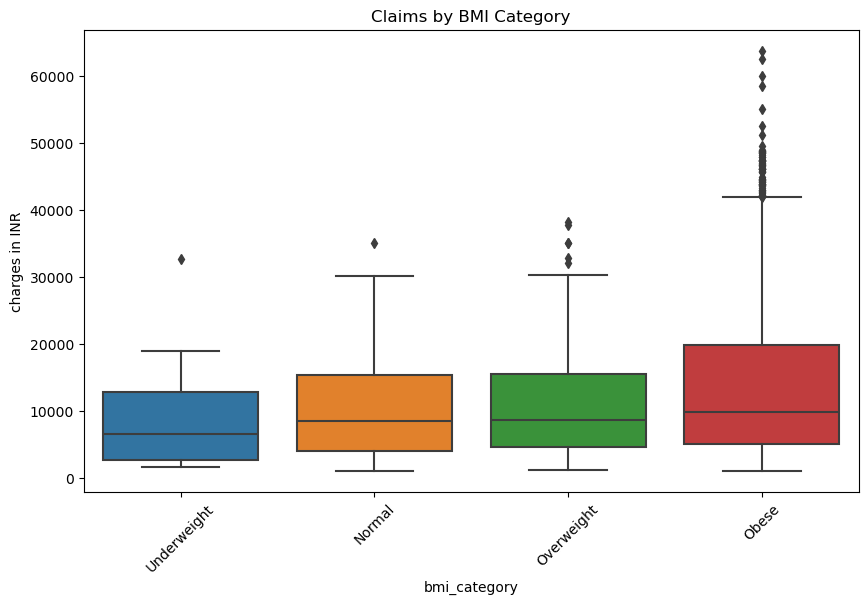

In [8]:
def bmi_analysis(df):
    # Create BMI categories
    df['bmi_category'] = pd.cut(df['bmi'], 
                               bins=[0, 18.5, 24.9, 29.9, float('inf')],
                               labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    
    bmi_stats = df.groupby('bmi_category')['charges in INR'].agg(['mean', 'count', 'std'])
    print("\nBMI Analysis:")
    print(bmi_stats)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='bmi_category', y='charges in INR', data=df)
    plt.title('Claims by BMI Category')
    plt.xticks(rotation=45)
    plt.show()

bmi_analysis(df)

A clear relationship exists between Body Mass Index (BMI) and insurance claims. Obese individuals demonstrate the highest average claims at ₹15,491.54, while underweight individuals have the lowest at ₹8,657.62. This strong correlation suggests BMI could be a crucial factor in risk assessment and premium calculation.


Smoking Analysis:
                mean  count           std
smoker                                   
no       8434.268298   1064   5993.781819
yes     32050.231832    274  11541.547176


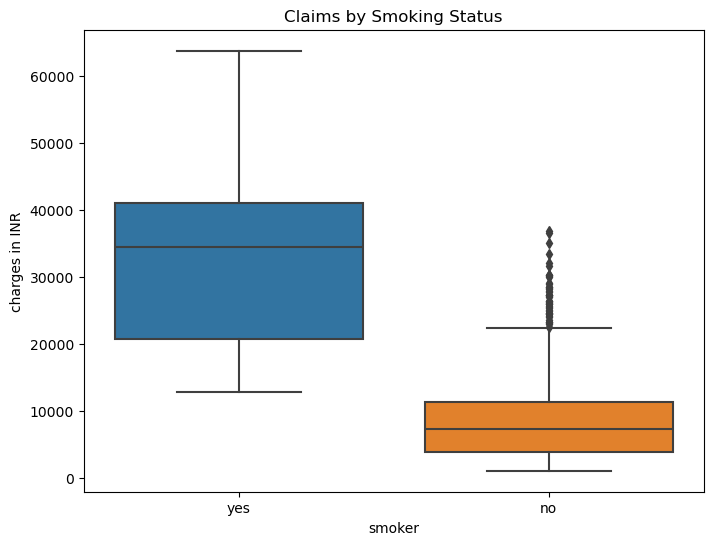

In [9]:
def smoking_analysis(df):
    smoking_stats = df.groupby('smoker')['charges in INR'].agg(['mean', 'count', 'std'])
    print("\nSmoking Analysis:")
    print(smoking_stats)
    
    # Visualize
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='smoker', y='charges in INR', data=df)
    plt.title('Claims by Smoking Status')
    plt.show()

smoking_analysis(df)

The analysis reveals a dramatic difference in claims between smokers and non-smokers. Non-smokers have an average claim of ₹8,434.27, while smokers average ₹32,050.23 – a nearly fourfold increase. This substantial gap underscores the critical importance of smoking status in determining insurance risk.

C:\Users\rajee\AppData\Local\Temp\ipykernel_2564\3501432144.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('age_group')['charges in INR'].agg(['mean', 'count', 'std'])
C:\Users\rajee\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)



Age Analysis:
                   mean  count           std
age_group                                   
<25         9087.015807    306  11756.765169
25-35      10495.163047    268  11349.435800
35-45      13493.485247    264  12096.975467
45-55      15986.900310    284  11367.399823
55+        18795.993816    216  11482.258434


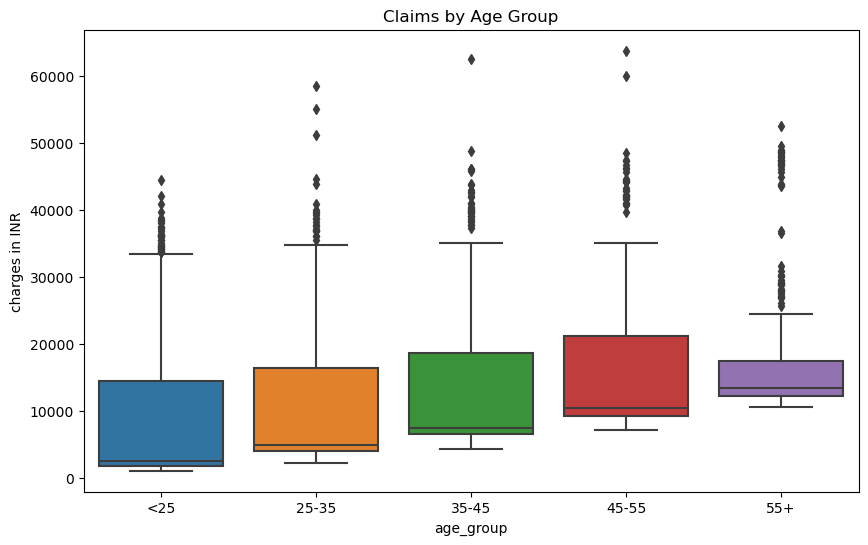

In [10]:
def age_analysis(df):
    df['age_group'] = pd.cut(df['age'], 
                            bins=[0, 25, 35, 45, 55, float('inf')],
                            labels=['<25', '25-35', '35-45', '45-55', '55+'])
    
    age_stats = df.groupby('age_group')['charges in INR'].agg(['mean', 'count', 'std'])
    print("\nAge Analysis:")
    print(age_stats)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='age_group', y='charges in INR', data=df)
    plt.title('Claims by Age Group')
    plt.show()

age_analysis(df)

A pronounced age-related progression in insurance claims is evident. Claims start at ₹9,087.02 for individuals under 25 and escalate to ₹18,795.99 for those 55 and older. This trend indicates that age is a significant factor in predicting potential healthcare expenditures.

The data suggests promising opportunities for implementing BMI-based discount strategies. Individuals in the normal and underweight categories demonstrate lower claim amounts, presenting an avenue for incentivizing and rewarding healthier lifestyle choices through preferential insurance pricing.

In [11]:
def prepare_data(df):
    # Separate features and target
    X = df.drop('charges in INR', axis=1)
    y = df['charges in INR']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [12]:
def build_model(X_train, X_test, y_train, y_test):
    # Create preprocessor
    categorical_features = ['sex', 'smoker', 'region']
    numerical_features = ['age', 'bmi', 'children']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
        ])
    
    # Create pipeline
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\nModel Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared Score: {r2:.2f}")
   
    return model

In [13]:
def main():
    try:
        data = load_data()
        # Build and evaluate model
        X_train, X_test, y_train, y_test = prepare_data(data)
        model = build_model(X_train, X_test, y_train, y_test)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()

C:\Users\rajee\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Model Performance:
Mean Squared Error: 20864569.51
R-squared Score: 0.87
